In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../data/credit_risk_dataset.csv")

## 1.  Features description



1. **`person_age`**: The age of the individual requesting the loan.
2. **`person_income`**: The annual income of the individual.
3. **`person_home_ownership`**: The individual's home ownership status.
   - **`rent`**: The individual is currently renting a property.
   - **`mortgage`**: The individual has a mortgage on the property they own.
   - **`own`**: The individual fully owns their home.
   - **`other`**: Other specific home ownership categories in the dataset.
4. **`person_emp_length`**: The individual's length of employment in years.
5. **`loan_intent`**: The purpose behind the loan request.
6. **`loan_grade`**: The loan grade assigned based on the applicant's creditworthiness.
   - **`A`**: The borrower has high creditworthiness, indicating a low risk.
   - **`B`**: The borrower has a relatively low risk, but less than grade A.
   - **`C`**: The borrower's creditworthiness is moderate.
   - **`D`**: The borrower is considered to have a higher risk than the previous grades.
   - **`E`**: The borrower has a lower creditworthiness, indicating a higher risk.
   - **`F`**: The borrower presents a significant credit risk.
   - **`G`**: The borrower has the lowest creditworthiness, representing the highest risk.
7. **`loan_amnt`**: The amount of the loan requested by the individual.
8. **`loan_int_rate`**: The interest rate associated with the loan.
9. **`loan_status`**: The status of the loan, where `0` indicates no default and `1` indicates default.
   - **`0`**: No default - The borrower successfully repaid the loan as agreed, and no default occurred.
   - **`1`**: Default - The borrower failed to repay the loan as agreed and defaulted.
10. **`loan_percent_income`**: The percentage of the income represented by the loan amount.
11. **`cb_person_default_on_file`**: The individual's history of defaults according to credit bureau records.
   - **`Y`**: The individual has a history of defaults on their credit record.
   - **`N`**: The individual does not have a history of defaults.
12. **`cb_person_cred_hist_length`**: The length of the individual's credit history.

## 2. Analysis

In [3]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
data.nunique()


person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [7]:
print(data.loan_status.value_counts())


loan_status
0    25473
1     7108
Name: count, dtype: int64


In [8]:
data.duplicated().sum()

165

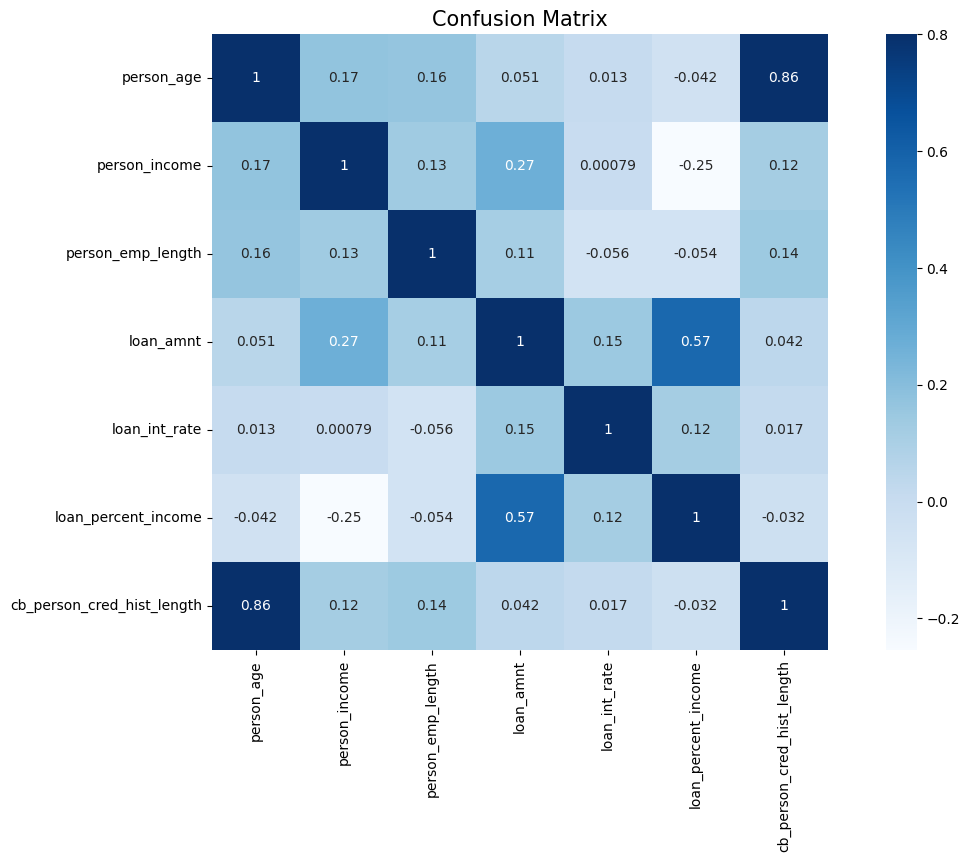

In [9]:
numeric_columns = [
    'person_age', 
    'person_income', 
    'person_emp_length', 
    'loan_amnt', 
    'loan_int_rate', 
    'loan_percent_income', 
    'cb_person_cred_hist_length'
]

data_numeric = data[numeric_columns]
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(data_numeric.corr(), vmax =.8, square = True, annot = True, cmap='Blues' )
plt.title('Confusion Matrix',fontsize=15);

### Univariate analysis

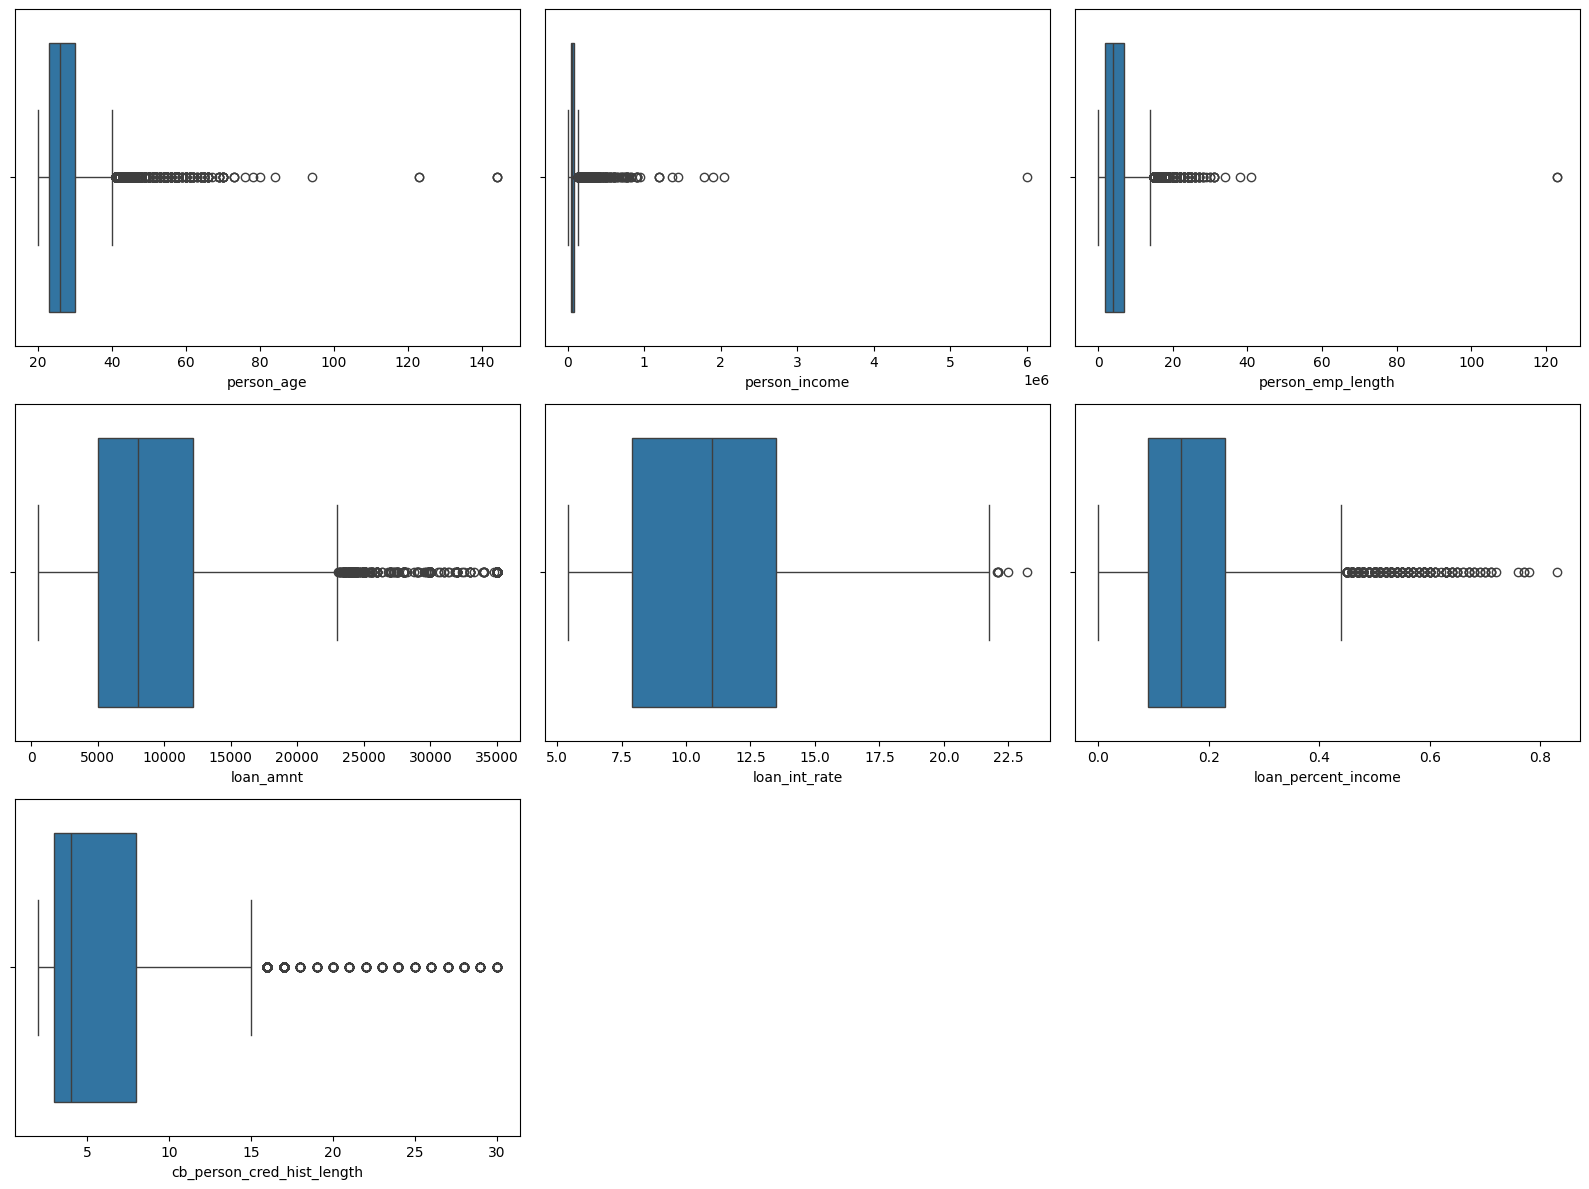

In [10]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data, x = col)

plt.tight_layout()
plt.show()


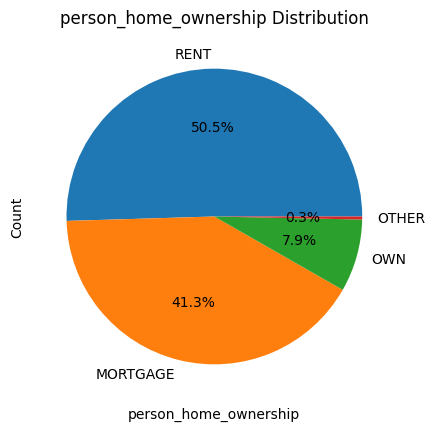

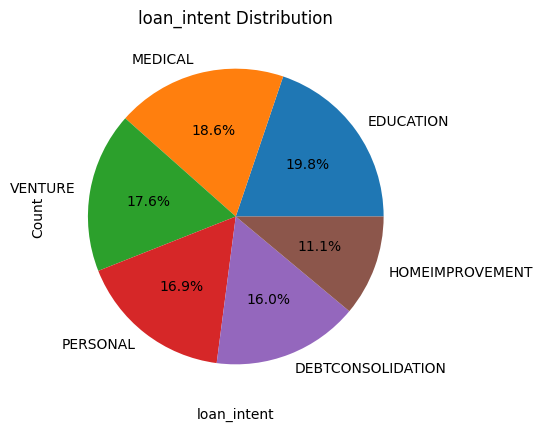

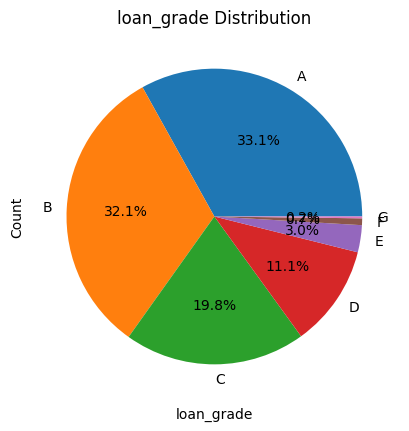

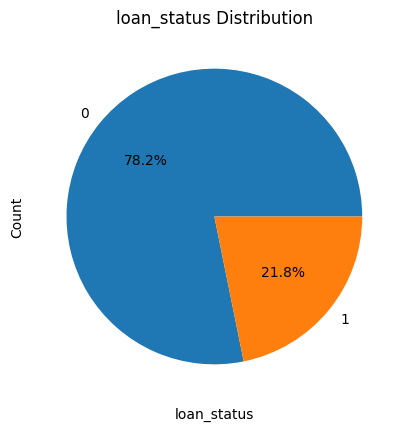

In [11]:
# 
pie = ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status']
for col in pie:
    val = data[col].value_counts()
    val.plot(kind= 'pie', autopct='%1.1f%%')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Distribution')
    plt.show()



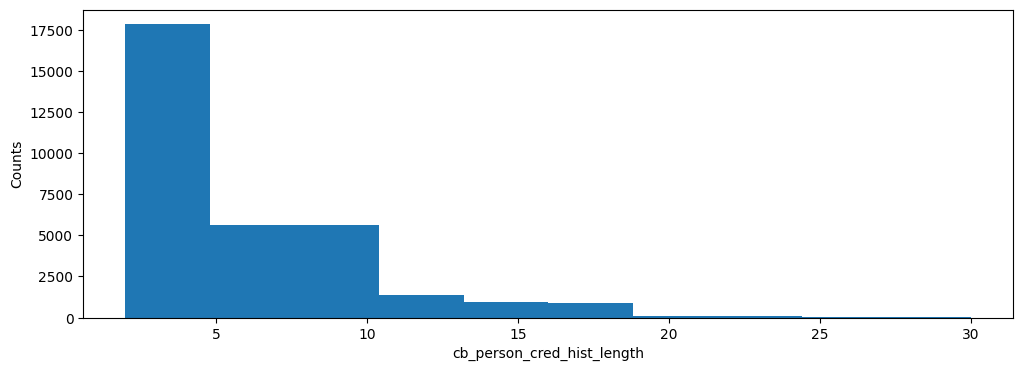

In [12]:
plt.figure(figsize = (12, 4))
plt.hist(data['cb_person_cred_hist_length'])
plt.xlabel("cb_person_cred_hist_length")
plt.ylabel('Counts')
plt.show()

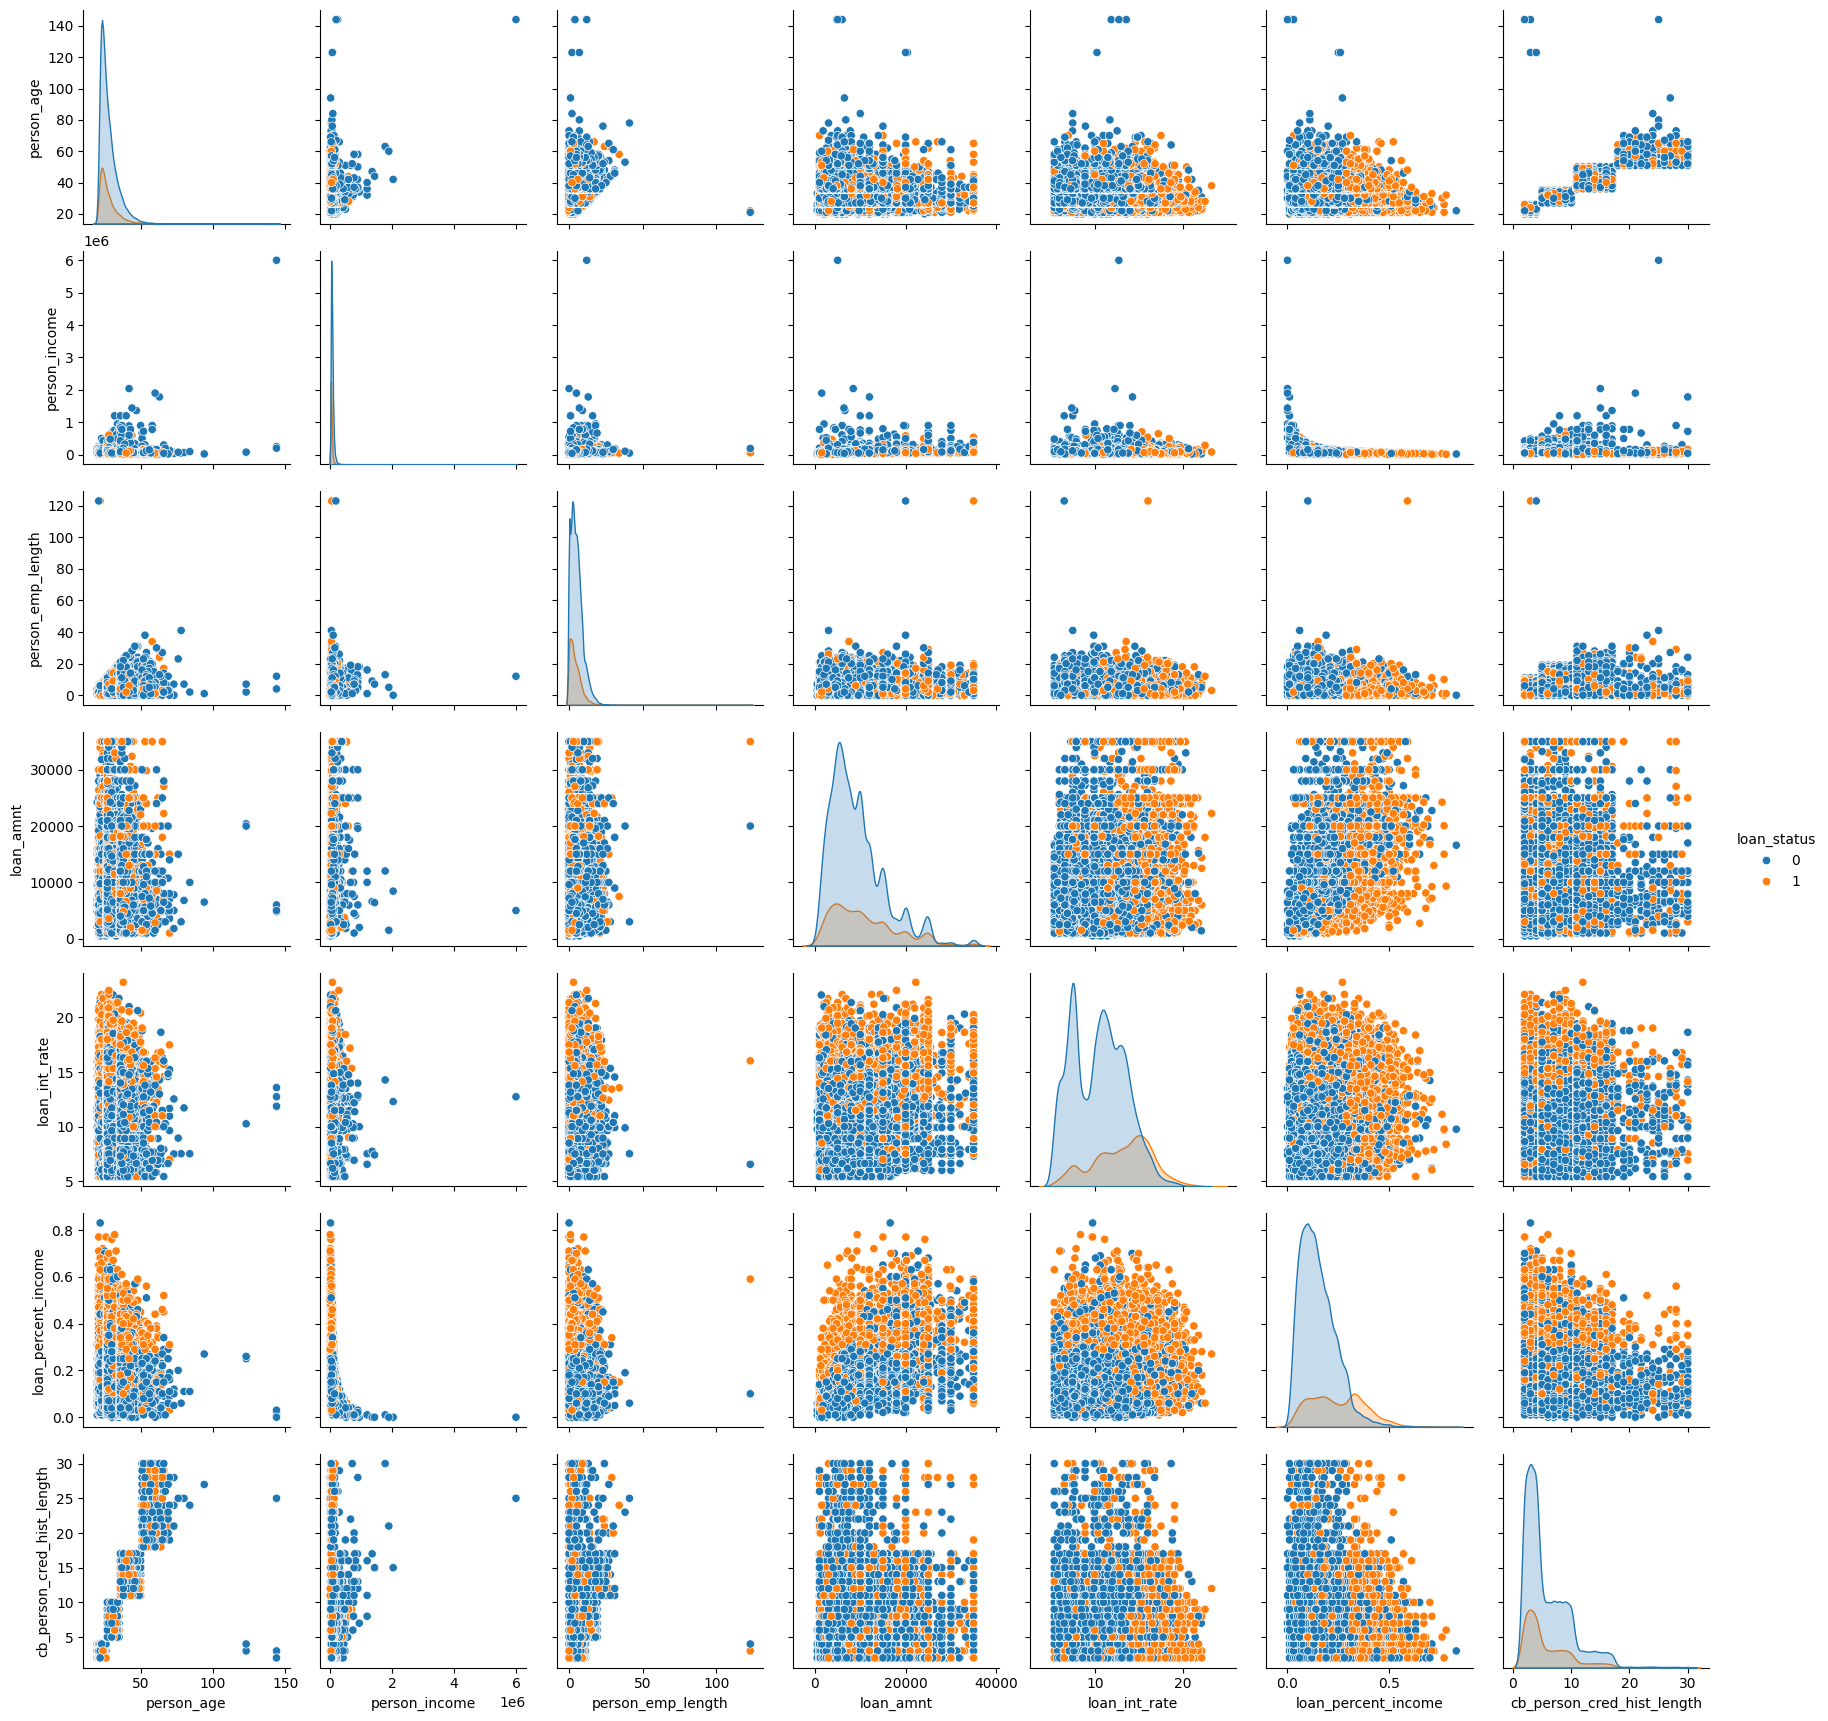

In [13]:
sns.pairplot(data,hue="loan_status")

## 5. Outliers, missing values and duplicates 

In [14]:
data.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
data.duplicated().sum()


165

In [16]:
data['person_emp_length']= data['person_emp_length'].fillna(data['person_emp_length'].median())
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].median())
data = data.drop_duplicates()

In [17]:
print(data.isnull().sum(), end="\n\n")
print(f"Duplicates : {data.duplicated().sum()}")


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Duplicates : 0


In [18]:
#Outliers extremes : 
# age = 144 ans
# income = 6.000.000
# durée de travail = 123 ans

data = data[data['person_age']<=80]
data = data[data['person_income']<=1000000]
data = data[data['person_emp_length']<=60]
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32399.000000,32399.000000,32399.000000,32399.000000,32399.000000,32399.000000,32399.000000,32399.000000
mean,27.722584,65536.746227,4.761196,9592.870922,11.014942,0.218772,0.170288,5.807309
std,6.184207,47058.939491,3.983249,6321.597583,3.083176,0.413420,0.106768,4.050815
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,80.000000,948000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## 6. Feature engineering

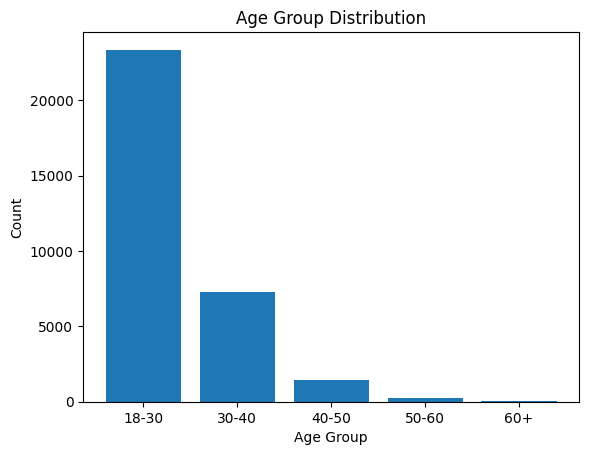

In [19]:
age_order = ["18-30", "30-40", "40-50", "50-60", "60+"]
data['age_group'] = pd.cut(data['person_age'],
                         bins=[18, 30, 40, 50, 60, float('inf')],
                         labels=age_order,
                         right=False)

data['age_group'] = pd.Categorical(data['age_group'], categories=age_order, ordered=True)

age_group = data['age_group'].value_counts()

plt.bar(age_group.index, age_group.values)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')

plt.show()




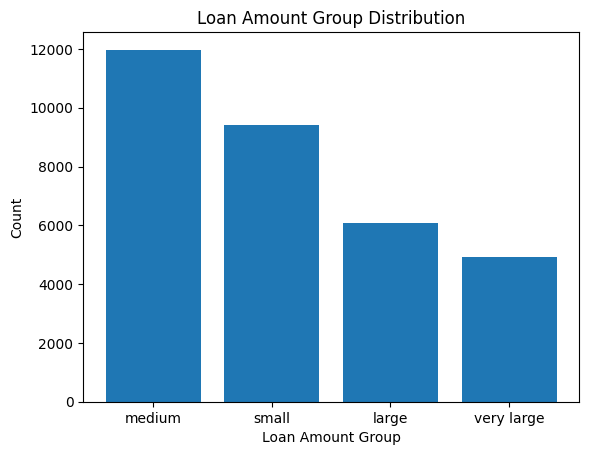

In [20]:
loan_amnt_order = ['small', 'medium', 'large', 'very large']
data['loan_amnt_group'] = pd.cut(data['loan_amnt'],
                               bins=[0, 5000, 10000, 15000, float('inf')],
                               labels=loan_amnt_order,
                               right=True)

data['loan_amnt_group'] = pd.Categorical(data['loan_amnt_group'], categories=loan_amnt_order, ordered=True)

loan_amnt_group = data['loan_amnt_group'].value_counts()
plt.bar(loan_amnt_group.index, loan_amnt_group.values)
plt.xlabel('Loan Amount Group')
plt.ylabel('Count')
plt.title('Loan Amount Group Distribution')

plt.show()


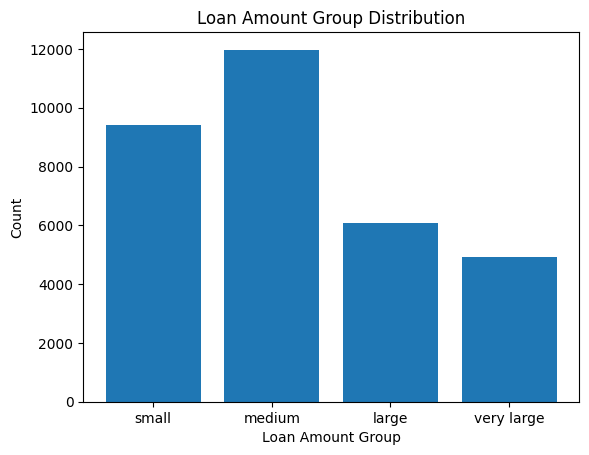

In [21]:
income_order = ['low', 'low-middle', 'middle', 'high-middle', 'high']
data['income_group'] = pd.cut(data['person_income'],
                            bins=[0, 20000, 50000, 100000, 200000, float('inf')],
                            labels=income_order,
                            right=False)

loan_amnt_group = data['loan_amnt_group'].value_counts().reindex(loan_amnt_order)

plt.bar(loan_amnt_group.index, loan_amnt_group.values)

plt.xlabel('Loan Amount Group')
plt.ylabel('Count')
plt.title('Loan Amount Group Distribution')

plt.show()



In [22]:
data['loan_to_income'] = data['loan_amnt']/data['person_income']
data['loan_to_emp_length_ratio'] = data['person_emp_length']/data['loan_amnt']
data['int_rate_to loan_amnt_ratio'] = data['loan_int_rate']/data['loan_amnt']
data = data.drop("loan_grade", axis=1)

In [23]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,loan_amnt_group,income_group,loan_to_income,loan_to_emp_length_ratio,int_rate_to loan_amnt_ratio
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,18-30,small,low,0.104167,0.005000,0.011140
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,18-30,medium,low,0.572917,0.000182,0.002340
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2,18-30,very large,middle,0.534351,0.000114,0.000435
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4,18-30,very large,middle,0.643382,0.000229,0.000408
5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,18-30,small,low,0.252525,0.000800,0.002856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30,50-60,medium,middle,0.109434,0.000172,0.002269
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19,50-60,very large,high-middle,0.146875,0.000227,0.000425
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28,60+,very large,middle,0.460526,0.000086,0.000314
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26,50-60,large,high-middle,0.100000,0.000333,0.000765


#### **`Interpretation`**
_The majority of people taking out a loan do not own property.  
_The nature of credit is distributed equitably.  
_The majority of the population wanting a loan is young.  
_People with higher salaries tend to take higher credit.  
_Lower-income applicants default more often
_Defaults increase as rates rise

In [24]:
data.to_csv("../data/processed.csv", index=False)
